# Лабораторная работа 4

*Создание выборок, построение графиков*

In [4]:
from numpy import random
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.stats import chi2
import math
import random
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.stats import t
from scipy.special import erf

a = -7
b = 11
a_theoretical = -1.5
b_theoretical = 1.5
interval_map = {0.005 + 0.005 * i: () for i in range(0, 198)}
n_list = {20: "red", 30: "green", 50:"black", 70: "yellow", 100: "blue", 150: "purple"}


def remake(eps):
    return eps * (b - a) + a


def make_y(x):
    return math.atan(x)

def build_graphics(interval_map, color):
    keys = list(interval_map.keys())
    for key in keys:
        X = [float(key), float(key)]
        Y = [interval_map[key][0], interval_map[key][1]]
        plt.plot(X, Y, color=color)

*Рассчет точечных мат ожидания и дисперсии*

In [7]:
def dotted_mathematical_waiting(x, n):
    return sum(x)/n


def dotted_dispersion(x, n, mx):
    temp_list = [(x[i] - mx)**2 for i in range(n)]
    return (1/(n-1)) * sum(temp_list)

*Рассчет теоретических мат ожидания и дисперсии*

In [8]:
def theoretical_math_waiting():
    result = integrate.quad(lambda x: x * 1/(18 * (math.cos(x)**2)), math.atan(-7), math.atan(11))
    return result[0]


def theoretical_dispersion(math_waiting):
    square_math_waiting = integrate.quad(lambda x: (x * x)/(18 * (math.cos(x)**2)), math.atan(-7), math.atan(11))
    return square_math_waiting[0] - math_waiting ** 2

*Рассчет интервала мат ожидания при неизвестной дисперсии, t - квантиль функции Стьюдента, i - уровень значмости альфа(p = 1 - i)*

In [9]:
def interval_mathematical_expectation(m, d):
    for i in interval_map.keys():
        st = t.ppf(i / 2, n-1) # или 1-i/2???
        interval_map[i] = (m - d * st / math.sqrt(n), m + d * st / math.sqrt(n)) # или корень таки из n - 1??

*Математическое ожидание при известной дисперсии*

In [10]:
def interval_mathematical_expectation_with_D(m, D):
    laplace = lambda x: erf(x / 2 ** 0.5)
    for i in interval_map.keys():
        lap = laplace((1 - i)/2)
        interval_map[i] = (m - math.sqrt(D / n) * lap, m + math.sqrt(D / n) * lap)

*Рассчет дисперсии при неизвестном мат ожидании*

In [26]:
def interval_dispersion(d, n):
    for i in interval_map.keys():
        alpha_a = chi2.isf(float(i)/2, n - 1)
        alpha_b = chi2.isf(1 - float(i)/ 2, n - 1)
        interval_map[i] = ((n-1) * d/alpha_a, (n-1) * d/alpha_b)
    return interval_map

*Рассчет дисперсии при известном мат ожидании*

In [29]:
def theoretical_interval_dispersion_for_other(m, y, n):
    S = (sum([(i - m) ** 2 for i in y]))/n
    global interval_map
    for i in interval_map.keys():
        alpha_a = chi2.isf(float(i) / 2, n)
        alpha_b = chi2.isf(1 - float(i)/ 2, n)
        interval_map[i] = (n * S/alpha_a, n * S/alpha_b)

*Построение графика*

In [13]:
def build_graphics(interval_map, color):
    keys = list(interval_map.keys())
    for key in keys:
        X = [float(key), float(key)]
        Y = [interval_map[key][0], interval_map[key][1]]
        plt.plot(X, Y, color=color)

*Генерация разного кол-ва выборок*

In [14]:
def make_list(n):
    eps = [random.uniform(0, 1) for i in range(n)]
    x = map(remake, eps)
    y = list(map(make_y, x))
    y = sorted(y)
    return y

*Построение интервалов мат ожидания при неизвестной дисперсии. Красный для 20, зелены -30 ,желтый-70 ,черный 50, синий 100, фиолетовый 150.*

dotted mathematical waiting for 20 = 0.6472404299809431
dotted dotted dispersion 20 = 1.4408189838936056
dotted mathematical waiting for 30 = 0.4054012161930416
dotted dotted dispersion 30 = 1.537885886496192
dotted mathematical waiting for 50 = 0.4273482560962583
dotted dotted dispersion 50 = 1.5304528367057526
dotted mathematical waiting for 70 = 0.6168678774274822
dotted dotted dispersion 70 = 1.354715013012221
dotted mathematical waiting for 100 = 0.4439017375557936
dotted dotted dispersion 100 = 1.4351868679529636
dotted mathematical waiting for 150 = 0.36276809640138624
dotted dotted dispersion 150 = 1.53461241783891


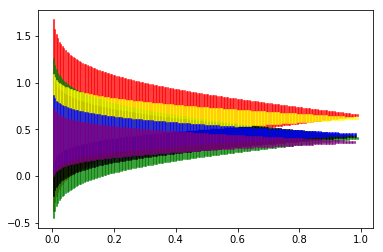

In [22]:
for n in n_list.keys():
    y = make_list(n)
    mx = dotted_mathematical_waiting(y, n)
    print("dotted mathematical waiting for " + str(n) + " = " + str(mx))
    d = dotted_dispersion(y, n, mx)
    print("dotted dotted dispersion " + str(n) + " = " + str(d))
    interval_mathematical_expectation(mx, d)
    build_graphics(interval_map, n_list[n])
plt.show()

    


Построение интервалов мат ожидания при известной дисперсии. Красный для 20, зелены -30 ,желтый-70 ,черный 50, синий 100, фиолетовый 150.

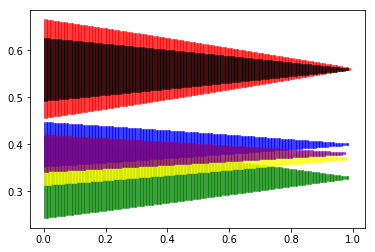

In [23]:
m = theoretical_math_waiting()
d = theoretical_dispersion(m)
for n in n_list.keys():
    y = make_list(n)
    m = dotted_mathematical_waiting(y, n)
    interval_mathematical_expectation_with_D(m, d)
    build_graphics(interval_map, n_list[n])
plt.show()

*Построение интервалов мат ожидания для 20 с неизвестной дисперсией(синий) и известной(красный)*

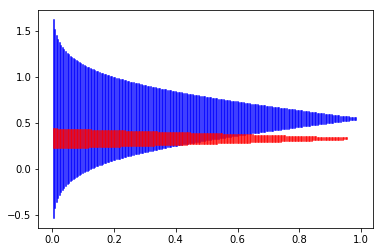

In [24]:
n = 20 
y = make_list(n)
mx = dotted_mathematical_waiting(y, n)
d = dotted_dispersion(y, n, mx)
interval_mathematical_expectation(mx, d)
build_graphics(interval_map, "blue")
m = theoretical_math_waiting()
d = theoretical_dispersion(m)
interval_mathematical_expectation_with_D(m, d)
build_graphics(interval_map, "red")
plt.show()

*Построение интервалов дисперсии при неизвестном мат ожидании. Красный для 20, зелены -30 ,желтый-70 ,черный 50, синий 100, фиолетовый 150.*

dotted mathematical waiting for 20 = 0.4040404461904103
dotted dotted dispersion 20 = 1.2712098759113213
dotted mathematical waiting for 30 = 0.3270528192671654
dotted dotted dispersion 30 = 1.7641897449809798
dotted mathematical waiting for 50 = 0.1340160395003042
dotted dotted dispersion 50 = 1.5919567564932366
dotted mathematical waiting for 70 = 0.2482028551630858
dotted dotted dispersion 70 = 1.445204375685236
dotted mathematical waiting for 100 = 0.2913216106105478
dotted dotted dispersion 100 = 1.6160637616664377
dotted mathematical waiting for 150 = 0.4719801798104721
dotted dotted dispersion 150 = 1.438620142100106


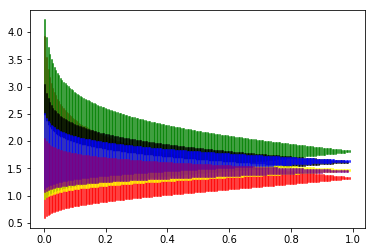

In [27]:
for n in n_list.keys():
    y = make_list(n)
    mx = dotted_mathematical_waiting(y, n)
    print("dotted mathematical waiting for " + str(n) + " = " + str(mx))
    d = dotted_dispersion(y, n, mx)
    print("dotted dotted dispersion " + str(n) + " = " + str(d))
    interval_dispersion(d, n)
    build_graphics(interval_map, n_list[n])
plt.show()

*Построение интервалов дисперсии при известном мат ожидании. Красный для 20, зелены -30 ,желтый-70 ,черный 50, синий 100, фиолетовый 150.*

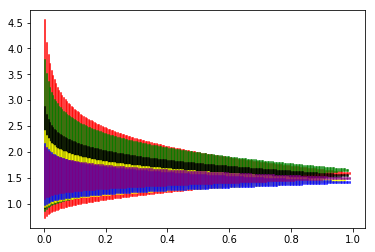

In [30]:
m = theoretical_math_waiting()
for n in n_list.keys():
    y = make_list(n)
    theoretical_interval_dispersion_for_other(m, y, n)
    build_graphics(interval_map, n_list[n])
plt.show()

*Построение интервалов дисперсии для 20 с неизвестным мат ожиданием(синий) и известным(красный)*

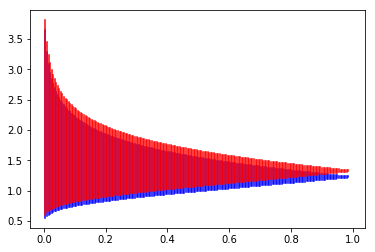

In [32]:
n = 20 
y = make_list(n)
mx = dotted_mathematical_waiting(y, n)
d = dotted_dispersion(y, n, mx)
interval_dispersion(d, n)
build_graphics(interval_map,"blue")
theoretical_interval_dispersion_for_other(m, y, n)
build_graphics(interval_map, "red")
plt.show()